Consider now the dispersion relation for deep-water surface waves when surface-tension effects dominate over gravitational,
\begin{equation}
    \omega^2 = \rho^{-1}\gamma|k|^3.
\end{equation}

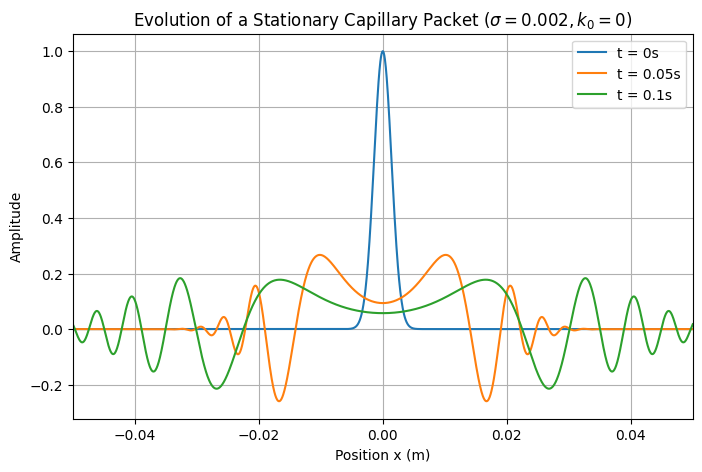

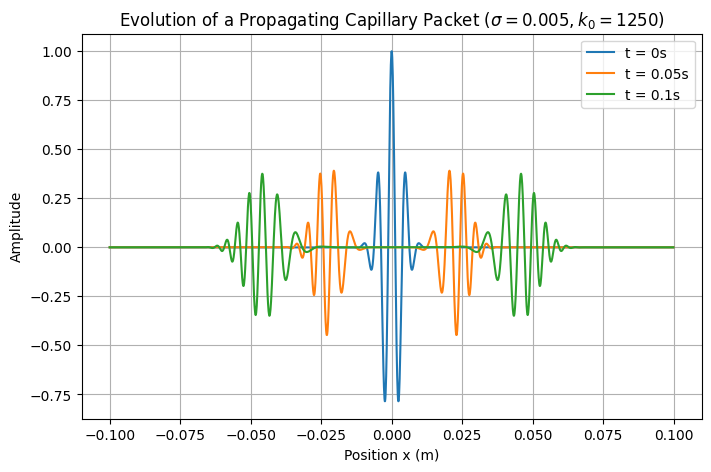

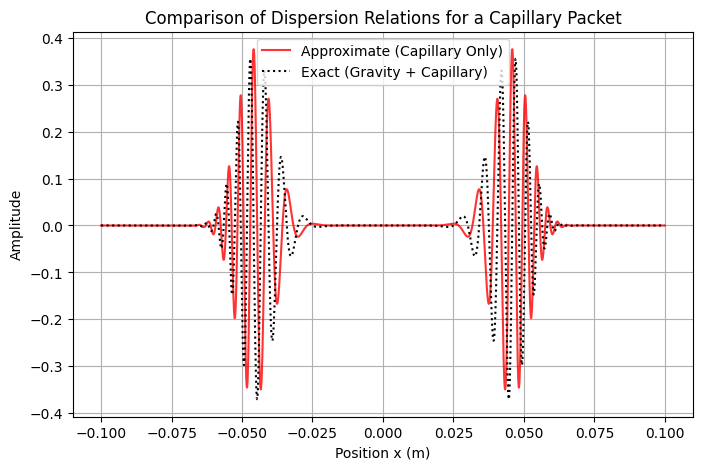

RMSE between approximate and exact solutions at t=0.1s: 1.265e-01


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def solve_wave_dispersion(t, sigma, k0, L, N, rho, gamma, g, use_exact_relation=False):
    '''
    Computes the wave profile. Can use approximate or exact deep-water relations.
    '''
    dx = L / N
    x = np.linspace(-L / 2, L / 2, N, endpoint=False)
    k = 2 * np.pi * np.fft.fftfreq(N, d=dx)
    F_x_0 = np.exp(-x**2 / sigma**2) * np.cos(k0 * x)
    A_k_0 = np.fft.fft(F_x_0)
    if use_exact_relation:
        omega_sq = g * np.abs(k) + (gamma / rho) * np.abs(k)**3
    else:
        if g == 0: # Capillary-dominant case
            omega_sq = (gamma / rho) * np.abs(k)**3
        else: # Gravity-dominant case
            omega_sq = g * np.abs(k)
    omega = np.sqrt(omega_sq)
    time_evolution_factor = np.cos(omega * t)
    A_k_t = A_k_0 * time_evolution_factor
    F_x_t = np.real(np.fft.ifft(A_k_t))
    return x, F_x_t

def calculate_rmse(signal1, signal2):
    '''
    Calculates the root nean square error between two signals.
    '''
    return np.sqrt(np.mean((signal1 - signal2)**2))

def run_capillary_simulations():
    # Stationary capillary packet (sigma=0.002, k0=0)
    sigma1, k0_1 = 0.002, 0.0
    # Justification: sigma is tiny (2mm), so we need high resolution (large N).
    # The packet spreads, but not excessively fast. L=0.2m is sufficient.
    L1, N1 = 0.2, 4096

    plt.figure(figsize=(8, 5))
    for t in [0, 0.05, 0.1]:
        x, sol = solve_wave_dispersion(t, sigma1, k0_1, L1, N1, rho=1000.0, gamma=0.074, g=0)
        plt.plot(x, sol, label=f't = {t}s')
    plt.title(r'Evolution of a Stationary Capillary Packet ($\sigma=0.002, k_0=0$)')
    plt.xlabel('Position x (m)'), plt.ylabel('Amplitude')
    plt.legend(), plt.grid(True), plt.xlim(-0.05, 0.05)
    plt.show()

    # Propagating capillary packet (sigma=0.005, k0=1250)
    sigma2, k0_2 = 0.005, 1250
    # Group velocity vg = 1.5 * sqrt(gamma/rho) * sqrt(k0) approx 0.45 m/s.
    # In t=0.1s, packet travels vg*t = 0.045m.
    # L must be > 2 * 0.045m = 0.09m. We choose L=0.2m for safety.
    # Wavelength is 2pi/k0 approx 5mm. N=2048 gives dx << wavelength.
    L2, N2 = 0.2, 2048

    plt.figure(figsize=(8, 5))
    for t in [0, 0.05, 0.1]:
        x, sol = solve_wave_dispersion(t, sigma2, k0_2, L2, N2, rho=1000.0, gamma=0.074, g=0)
        plt.plot(x, sol, label=f't = {t}s')
    plt.title(r'Evolution of a Propagating Capillary Packet ($\sigma=0.005, k_0=1250$)')
    plt.xlabel('Position x (m)'), plt.ylabel('Amplitude')
    plt.legend(), plt.grid(True)
    plt.show()

    # Effect of the exact dispersion relation
    t_final = 0.1
    # Run simulation with approximate relation (g=0)
    x, sol_approx = solve_wave_dispersion(t_final, sigma2, k0_2, L2, N2, rho=1000.0, gamma=0.074, g=0)
    # Run simulation with exact relation
    x, sol_exact = solve_wave_dispersion(t_final, sigma2, k0_2, L2, N2, rho=1000.0, gamma=0.074, g=9.81, use_exact_relation=True)

    rmse = calculate_rmse(sol_approx, sol_exact)

    plt.figure(figsize=(8, 5))
    plt.plot(x, sol_approx, 'r-', label='Approximate (Capillary Only)', alpha=0.8)
    plt.plot(x, sol_exact, 'k:', label='Exact (Gravity + Capillary)')
    plt.title('Comparison of Dispersion Relations for a Capillary Packet')
    plt.xlabel('Position x (m)'), plt.ylabel('Amplitude')
    plt.legend(), plt.grid(True)
    plt.show()
    print(f"RMSE between approximate and exact solutions at t={t_final}s: {rmse:.3e}")

run_capillary_simulations()

The behavior of capillary waves is different from gravity waves due to the fundamentally different dispersion relation.
*   For capillary Waves, the phase velocity satisfies $v_p = \frac{\omega}{k} \propto \sqrt{|k|}$ and the group velocity $v_g = \frac{d\omega}{dk} \propto \sqrt{|k|}$. This means that shorter wavelengths (larger $k$) travel faster.
*   In contrast, for gravity waves we have $v_p \propto \frac{1}{\sqrt{|k|}}$ and $v_g \propto \frac{1}{\sqrt{|k|}}$. Here, longer wavelengths (smaller $k$) travel faster.

More precisely, for capillary waves
\begin{equation}
    vg = \frac{d\omega}{dk} = \frac{3}{2}\sqrt{\frac{\gamma |k|}{ρ}} = \frac{3}{2}v_p.
\end{equation}
The group envelope moves faster than the individual wave crests within it. Again, for gravity waves, $v_g = \frac{1}{2}v_p$, so the group envelope moves at slower then the crests.

We see in the stationary packet the initial disturbance spreading with the ripples on the leading edge of the disturbance having a very short wavelength.

Observing now the progagating wave, the individual crests now appear at the front of the packet, travel backwards relative to the envelope, and disappear at the rear. This is the opposite of what happens with gravity waves.

Consider the exact relation with both gravity an capillary effects,
\begin{equation}
    \omega^2 = g|k| + \rho^{-1}\gamma|k|^3.
\end{equation} instead of the capillary-only approximation.

The approximation is reasonable accurate in this scenario. The physical reason is found by comparing the magnitudes of the two terms in the exact relation at the central wavenumber $k_0 = 1250$:
*   Gravity term: $g|k_0| \approx 1.23 \times 10^4$.
*   Capillary term: $\frac{\gamma}{\rho}|k_0|^3 \approx 1.45 \times 10^8$.
The capillary term much larger than the gravity term. Therefore, the contribution of gravity to the dynamics of the short-wavelength ripples is largely negligible. Gravity only becomes a significant factor for waves with much longer wavelengths.